In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

<!-- Read Data -->

#### Read Data

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   
7  ...                         2            80                 1   
8  ...                         2            80                 0   
9  ...                         2            80                 2   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   
7                  1                      2               3               1   
8                 10                      2               3               9   
9                 17                      3               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  
7                  0                        0                     0  
8                  7                        1             

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.shape

(1470, 35)

In [6]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

#### Categorical data Info

In [7]:
for col in df.select_dtypes('object').columns:
    print(df[col].unique(), col)

['Yes' 'No'] Attrition
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] BusinessTravel
['Sales' 'Research & Development' 'Human Resources'] Department
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] EducationField
['Female' 'Male'] Gender
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] JobRole
['Single' 'Married' 'Divorced'] MaritalStatus
['Y'] Over18
['Yes' 'No'] OverTime


In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [10]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [11]:
df['MonthlyIncome']

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

In [12]:
df['MonthlyRate']

0       19479
1       24907
2        2396
3       23159
4       16632
        ...  
1465    12290
1466    21457
1467     5174
1468    13243
1469    10228
Name: MonthlyRate, Length: 1470, dtype: int64

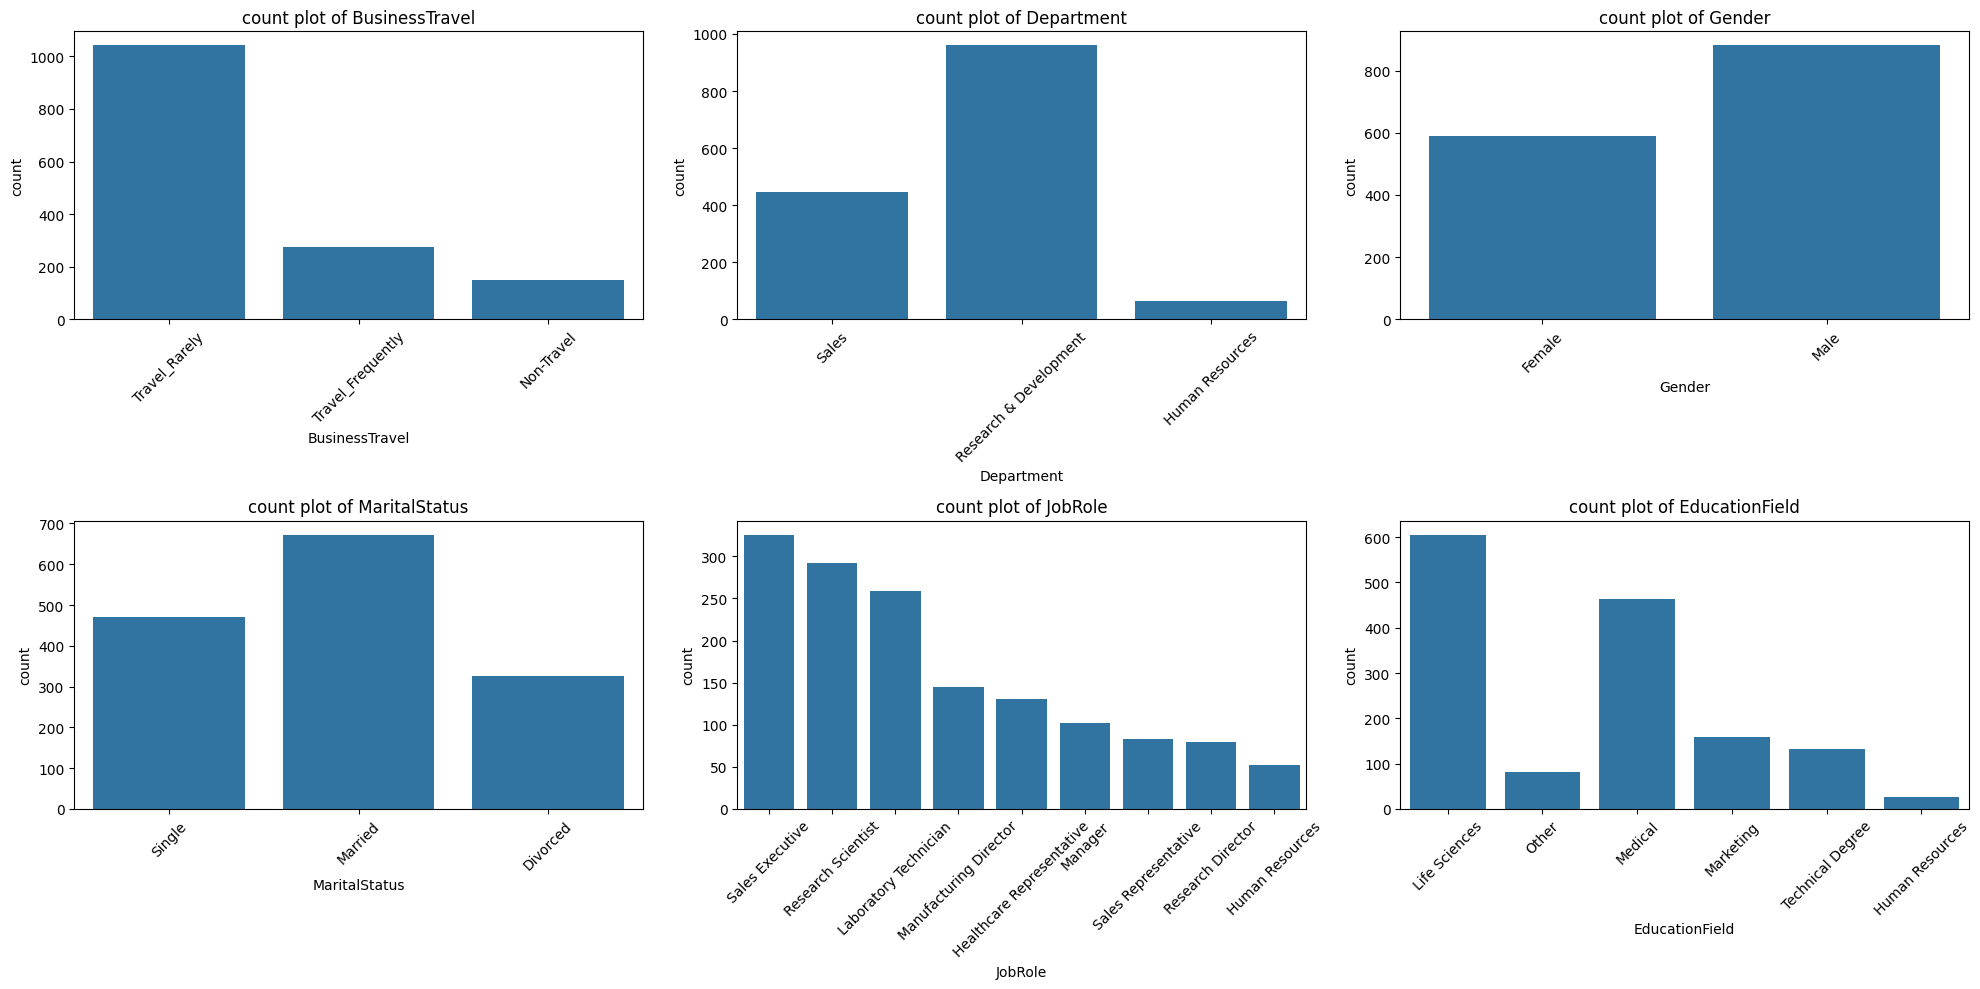

In [13]:
fig, axes = plt.subplots(2,3,figsize = (20,10))
axes = axes.flatten()
columns = ['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'JobRole', 'EducationField']

for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'count plot of {column}')
    axes[i].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()    

In [14]:
# Identify the data types of columns
column_data_types = df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        numerical_count += 1
    else: categorical_count += 1

print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 26 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


In [15]:
print("Duplicates in dataset: ", df.duplicated().sum())

Duplicates in dataset:  0


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(14, 6))

    # PIE CHART
    value_counts = df[col].value_counts().sort_index()
    print("Pie Data:", value_counts)  # DEBUG

    if value_counts.empty:
        print("No data to plot for pie chart!")
        return

    plt.subplot(1, 2, 1)
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(value_counts))
    plt.pie(value_counts.values,
            labels=value_counts.index,
            autopct="%.1f%%",
            pctdistance=0.75,
            startangle=90,
            colors=colors,
            textprops={"fontsize": 14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    # BAR CHART
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    yes_counts = new_df[col].value_counts().sort_index().reindex(value_counts.index, fill_value=0)
    percentages = np.floor((yes_counts / value_counts) * 100).fillna(0).values

    sns.barplot(x=yes_counts.index, y=yes_counts.values, palette='Set2')
    plt.title(f"{hue} Rate by {col}", fontweight="black", size=14, pad=15)

    for i, val in enumerate(yes_counts.values):
        plt.text(i, val, f"{val} ({int(percentages[i])}%)", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()


Pie Data: MaritalStatus
Divorced    327
Married     673
Single      470
Name: count, dtype: int64


C:\Users\Simran Bawaskar\AppData\Local\Temp\ipykernel_19584\613938636.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yes_counts.index, y=yes_counts.values, palette='Set2')
c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = gr

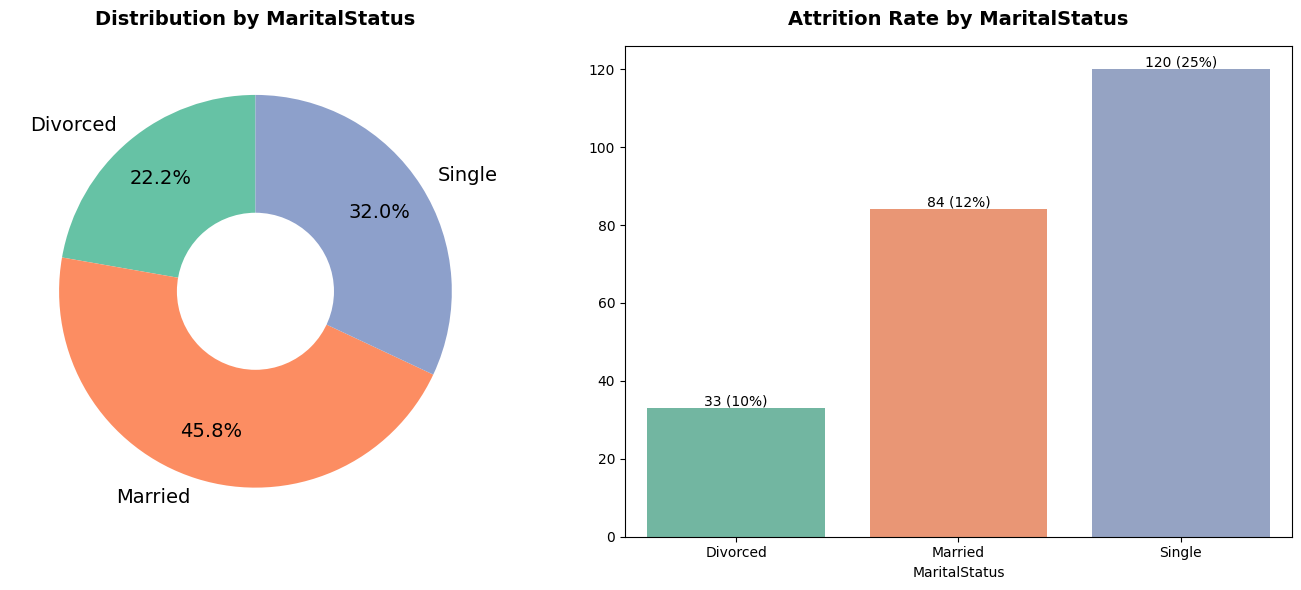

In [21]:
pie_bar_plot(df, 'MaritalStatus', 'Attrition')

#### 1: 'Below College', 2: 'College', 3: 'Bachelor', 4:'Master', 5:'Doctor'

Pie Data: Education
1    170
2    282
3    572
4    398
5     48
Name: count, dtype: int64


C:\Users\Simran Bawaskar\AppData\Local\Temp\ipykernel_19584\613938636.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yes_counts.index, y=yes_counts.values, palette='Set2')
c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = gr

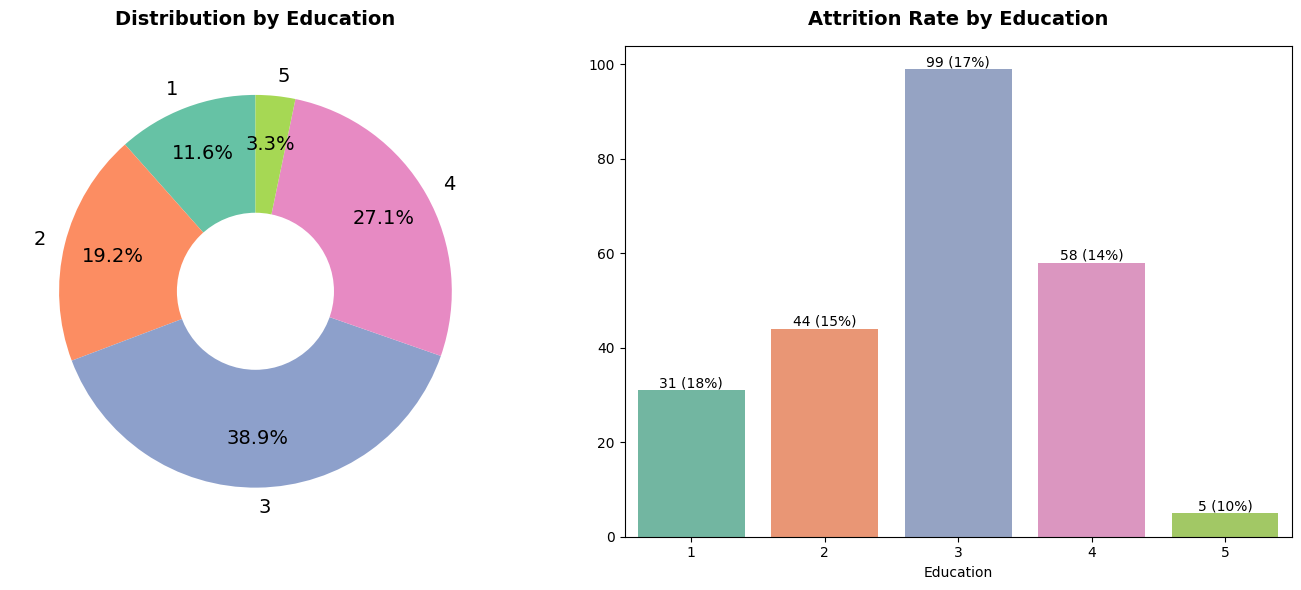

In [22]:
pie_bar_plot(df, 'Education', 'Attrition')

In [27]:
import plotly.graph_objects as go

# Separate the data based on Attrition status
df_no_attrition = df[df["Attrition"] == "No"]
df_attrition = df[df["Attrition"]== "Yes"]

# Create a 3D scatte plot
fig = go.Figure()

# Add scatter plot for employee who stayed
fig.add_trace(go.Scatter3d(
    x=df_no_attrition["Age"],
    y=df_no_attrition["MonthlyIncome"],
    z=df_no_attrition["YearsAtCompany"],
    mode="markers",
    marker=dict(size=5, color="blue", opacity=0.6),
    name="No Attrition"
))


# Add scatter plot for employees who left
fig.add_trace(go.Scatter3d(
    x=df_attrition["Age"],
    y=df_attrition["MonthlyIncome"],
    z=df_attrition["YearsAtCompany"],
    mode="markers",
    marker=dict(size=5, color="red", opacity=0.6),
    name="Attrition"
))


# Set layout
fig.update_layout(
    title="3D Scatter Plot: Age vs Monthly Income vs Years at Company",
    scene=dict(
        xaxis_title="Age",
        yaxis_title="Monthly Income",
        zaxis_title="Years at Company"
    ),
    margin=dict(l=0, r=0, b=0,t=0)
)

C:\Users\Simran Bawaskar\AppData\Local\Temp\ipykernel_19584\420657785.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a f

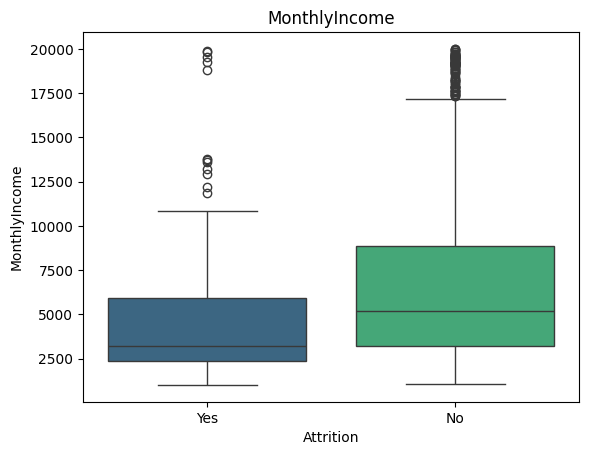

In [29]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette="viridis")
plt.title("MonthlyIncome")
plt.show()

C:\Users\Simran Bawaskar\AppData\Local\Temp\ipykernel_19584\1863493894.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a 

Text(0, 0.5, 'Age')

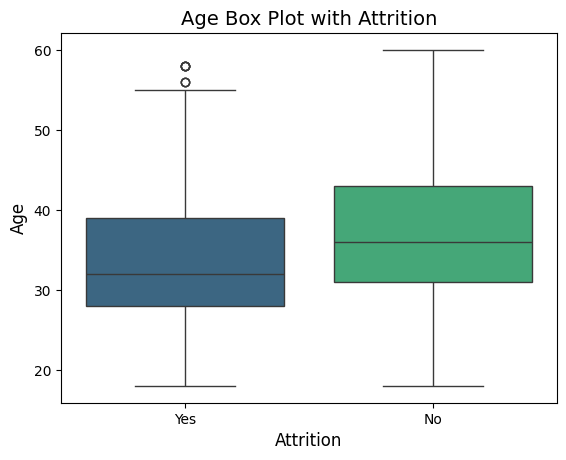

In [30]:
# Plot the box plot for age with attrition
sns.boxplot(data= df, x="Attrition", y="Age", palette="viridis")
plt.title("Age Box Plot with Attrition", fontsize=14)
plt.xlabel("Attrition", fontsize=12)
plt.ylabel("Age", fontsize=12)

#### Age Distribution

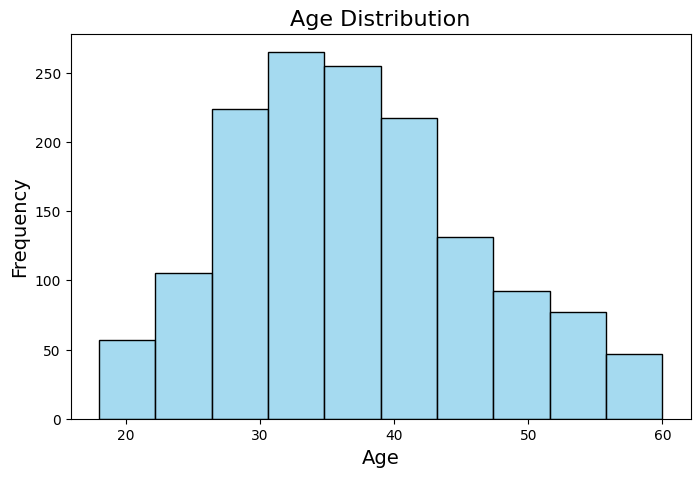

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=10, kde=False, color='skyblue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

C:\Users\Simran Bawaskar\AppData\Local\Temp\ipykernel_19584\3457783603.py:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



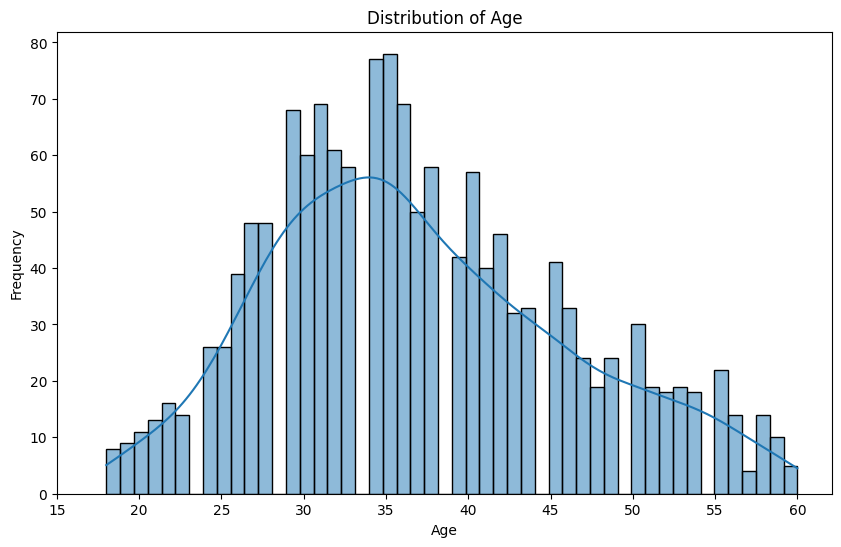

In [37]:
# Define figure size
plt.figure(figsize=(10,6))

# Plot the histogram
ax = sns.histplot(df['Age'], bins=50, kde=True, palette='viridis')

#Add labels and title
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xticks([i for i in range(15,65,5)])

# Show the plot
plt.show()

In [39]:
mean_age = df["Age"].mean()
std_age = df["Age"].std()

print(f"Mean Age:{mean_age: .2f}")
print(f"Standard deviation of age: {std_age: .2f}")



Mean Age: 36.92
Standard deviation of age:  9.14


In [42]:
df["Age"].max()
df["Age"].min()

18

Attrition Percentage

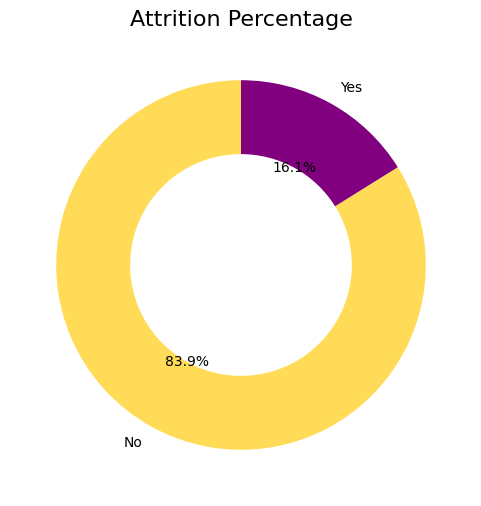

In [46]:
attrition_count = df['Attrition'].value_counts()

labels= attrition_count.index
sizes = attrition_count.values
colors=['#FFDB58', '#800080']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width':0.4})

plt.title('Attrition Percentage', fontsize=16)
plt.show()


In [47]:
attrition_count

Attrition
No     1233
Yes     237
Name: count, dtype: int64

Gender Distribution

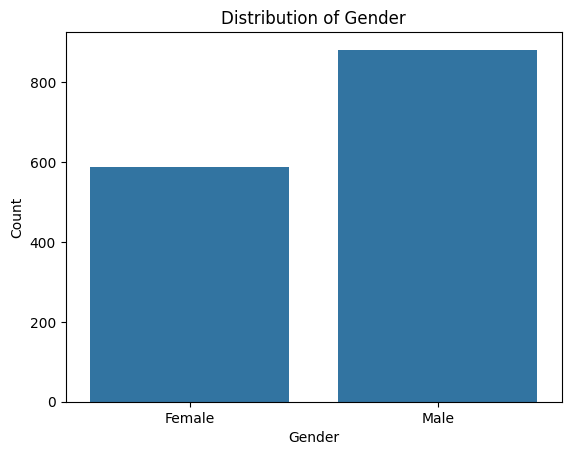

In [49]:
sns.countplot(data=df, x='Gender')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Display the plot
plt.show()

Does the low percentage in salary hike affect the attrition rate?

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seabo

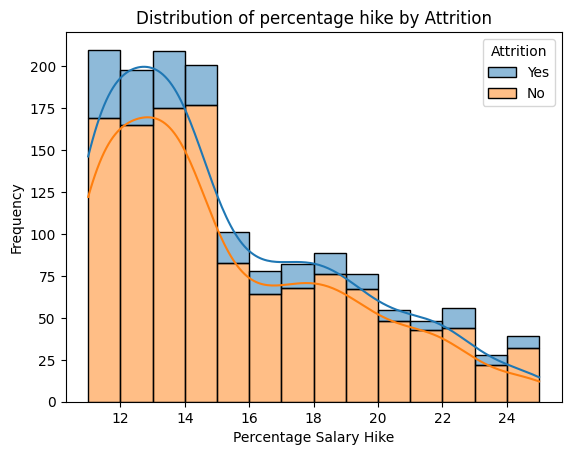

In [55]:
# Assuming you have a dataframe and the columns are named 'PercentSalaryHike' and 'Attrition'
sns.histplot(data=df, x='PercentSalaryHike', hue='Attrition', multiple='stack', kde=True)

#Set labels and Title
plt.xlabel('Percentage Salary Hike')
plt.ylabel('Frequency')
plt.title('Distribution of percentage hike by Attrition')

#Display the plot
plt.show()

Is there a department within the company with poor relationship satisfaction among job mates?

4 in High, 1 is Low

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seabo

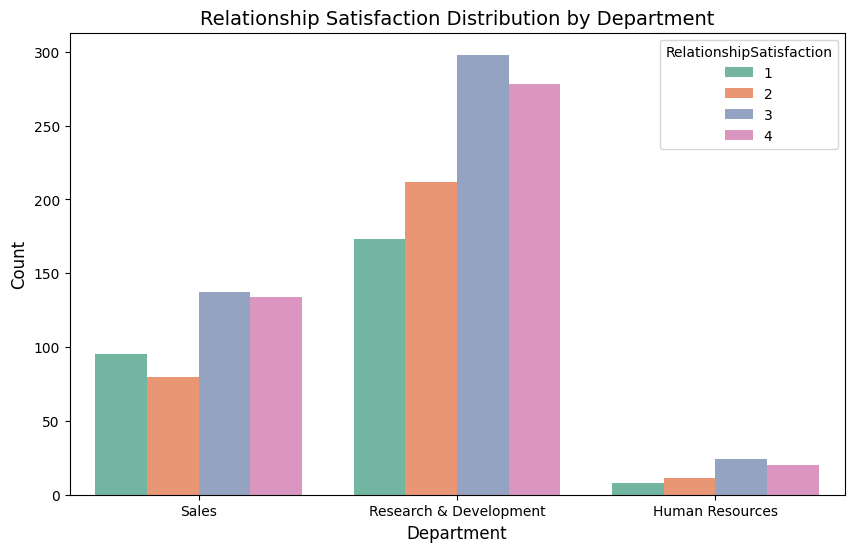

In [56]:
# Create a countplot
plt.figure(figsize=(10,6))
sns.countplot(x="Department", hue="RelationshipSatisfaction", data=df, palette= 'Set2')

#Add title and labels
plt.title('Relationship Satisfaction Distribution by Department', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show plot
plt.show()

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seabo

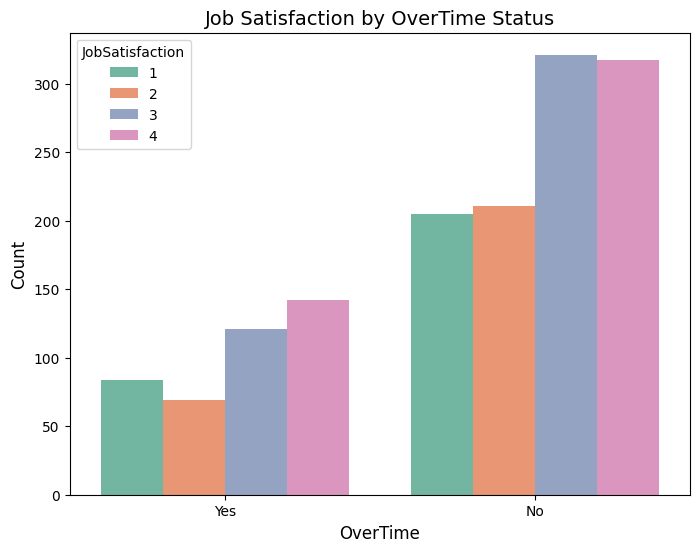

In [57]:
# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='OverTime', hue='JobSatisfaction', data=df, palette='Set2')

# Add title and labels
plt.title('Job Satisfaction by OverTime Status', fontsize=14)
plt.xlabel('OverTime', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show plot
plt.show()

In [62]:
grouped_data = df.groupby(['OverTime','JobSatisfaction']).size().reset_index(name='Count')

total_counts = grouped_data.groupby('OverTime')['Count'].transform('sum')
grouped_data['Percentage']= (grouped_data['Count'] / total_counts) * 100
print(grouped_data)

  OverTime  JobSatisfaction  Count  Percentage
0       No                1    205   19.449715
1       No                2    211   20.018975
2       No                3    321   30.455408
3       No                4    317   30.075901
4      Yes                1     84   20.192308
5      Yes                2     69   16.586538
6      Yes                3    121   29.086538
7      Yes                4    142   34.134615


Heatmap to show the correlation between each attribute in the data

<Axes: >

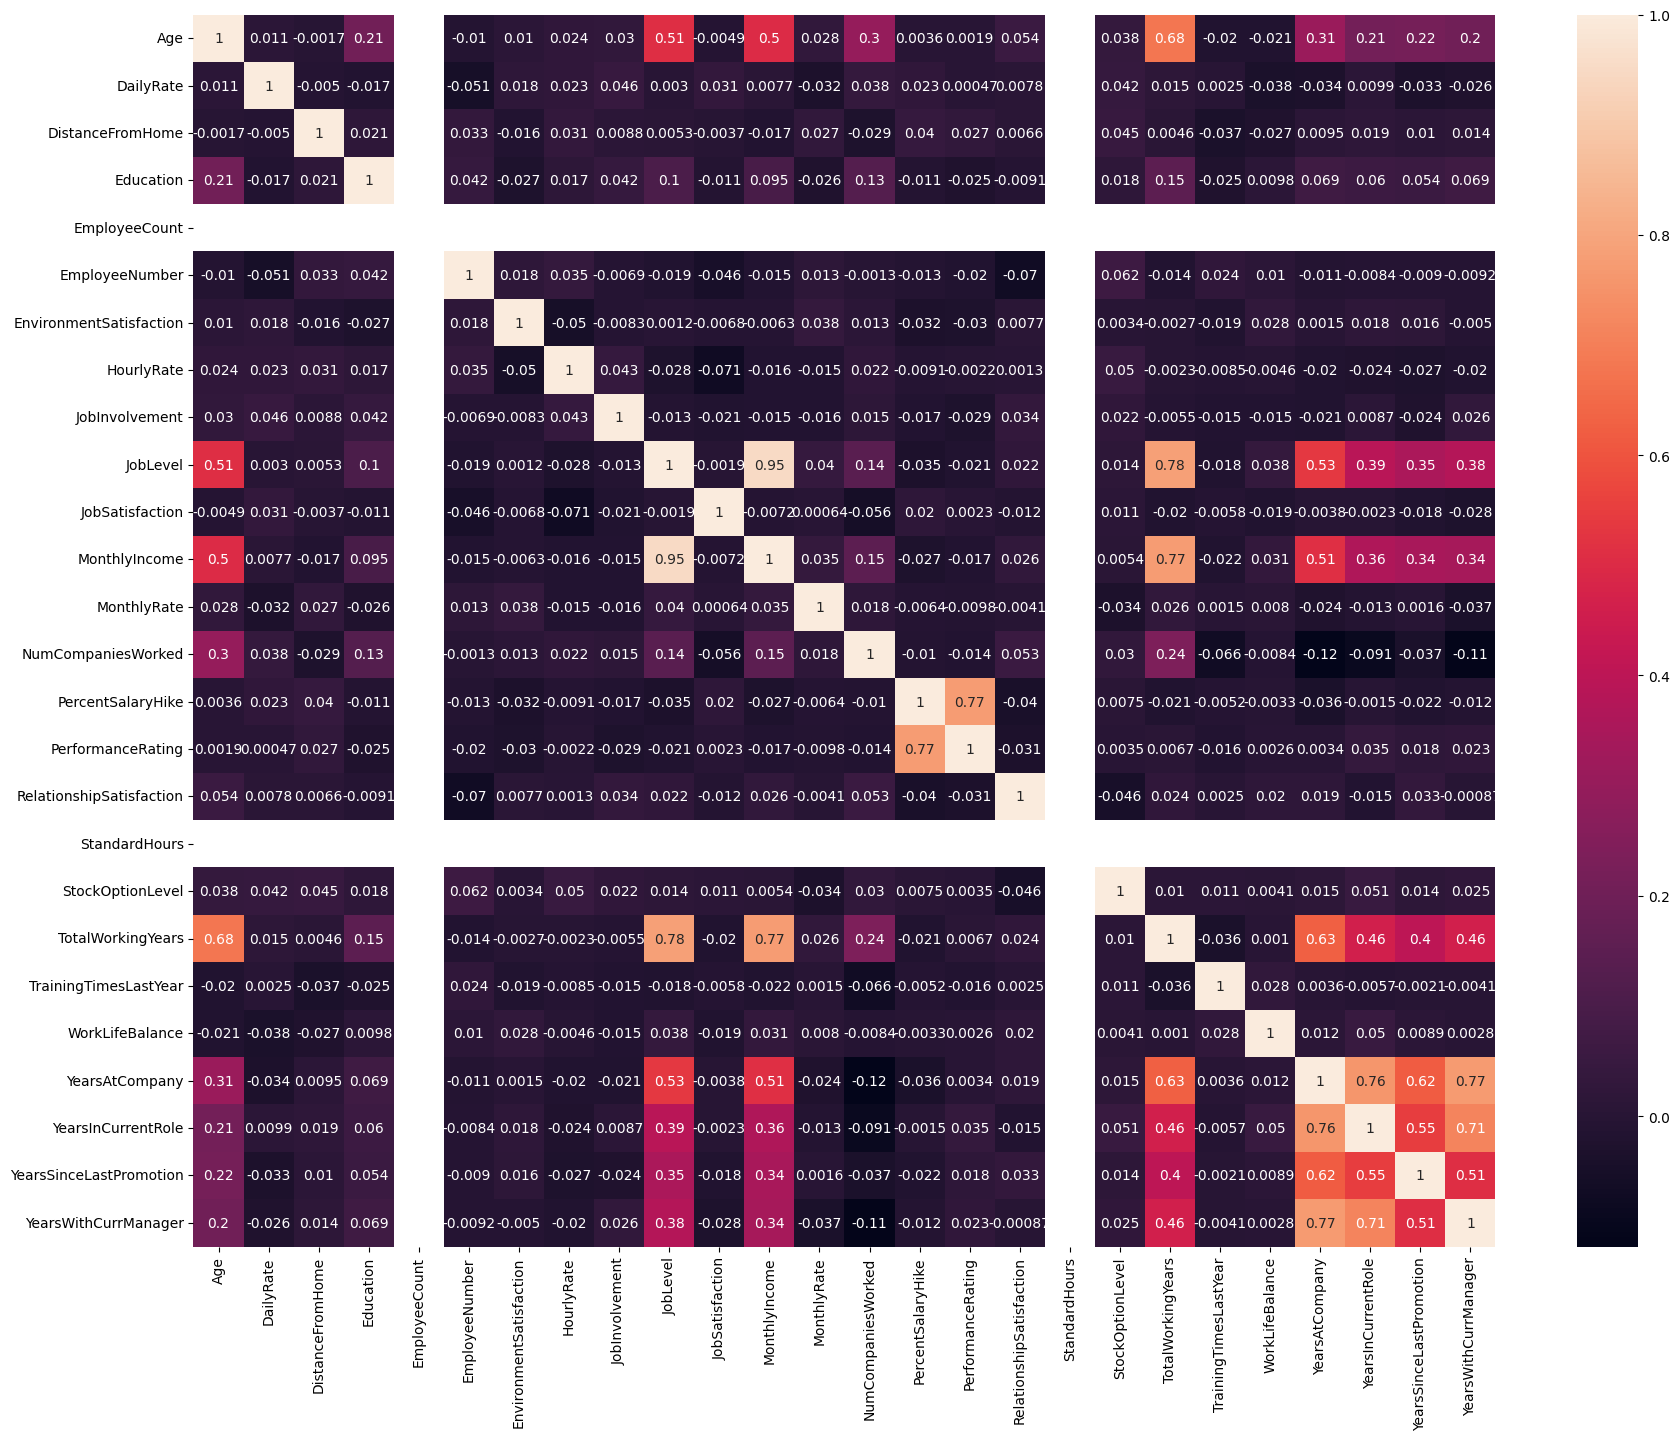

In [65]:
plt.figure(figsize=(21,16))
sns.heatmap(df.select_dtypes('number').corr(),annot=True)

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



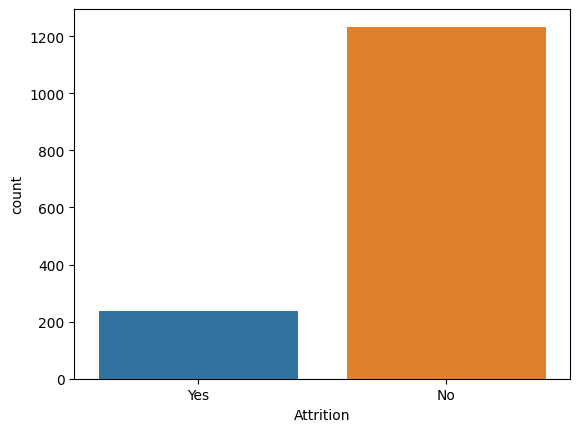

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



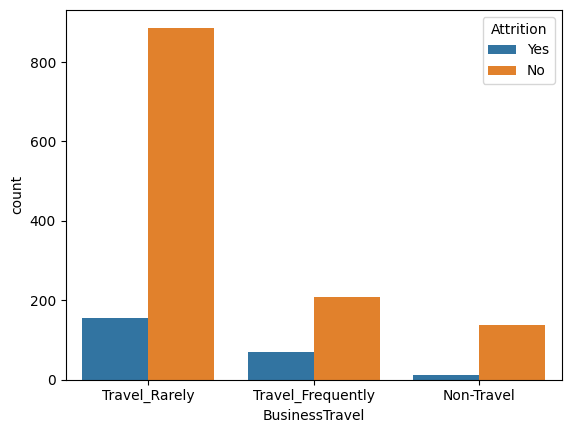

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



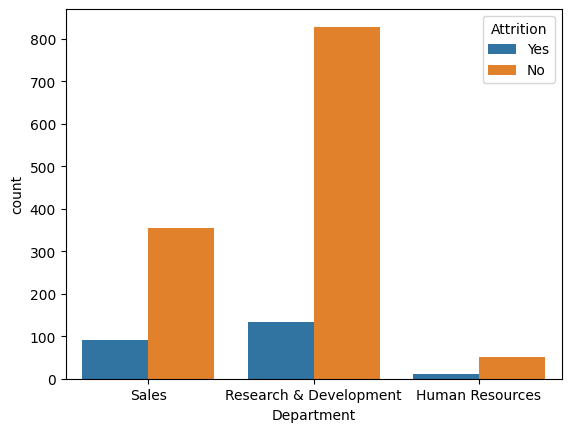

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



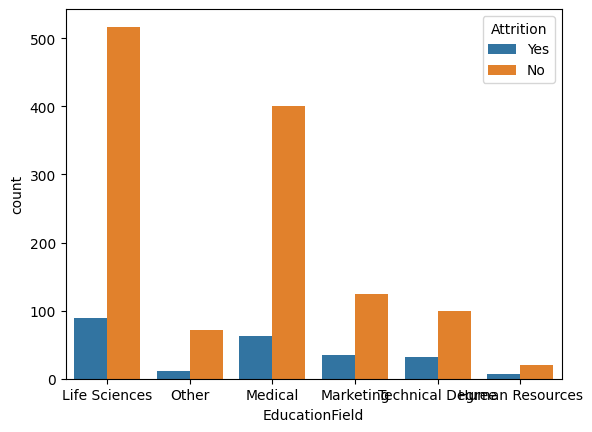

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



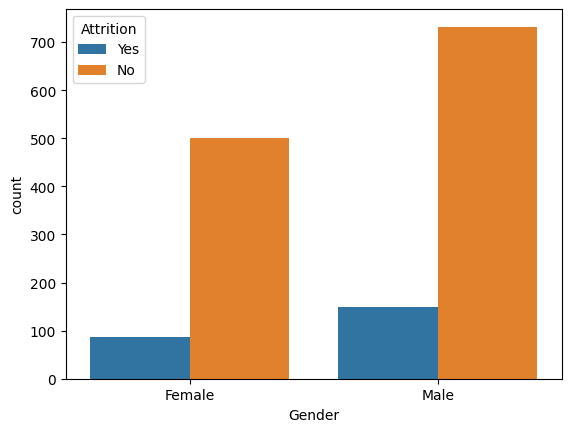

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



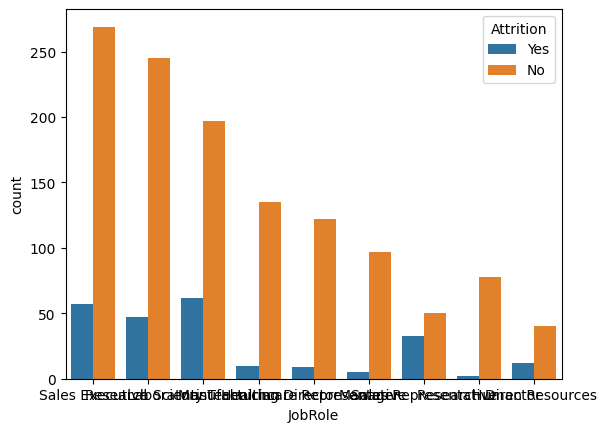

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



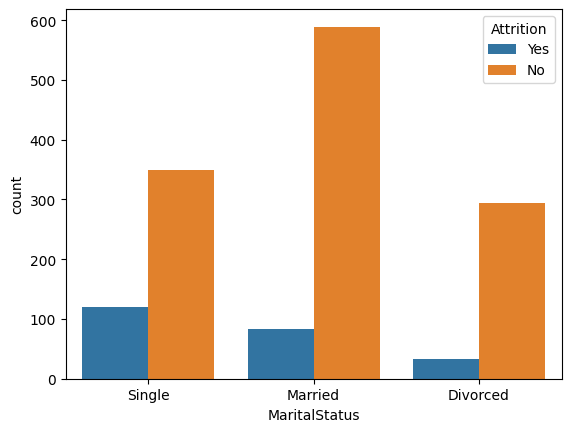

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



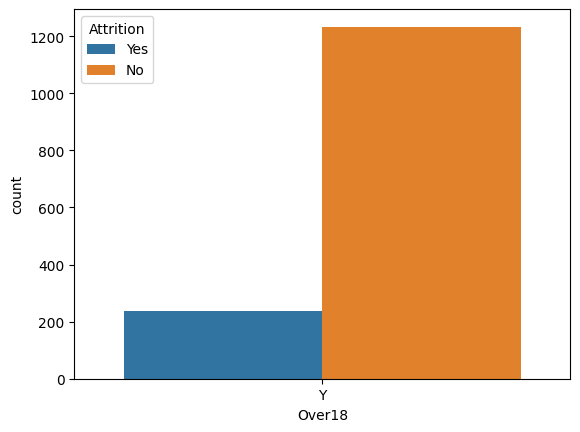

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



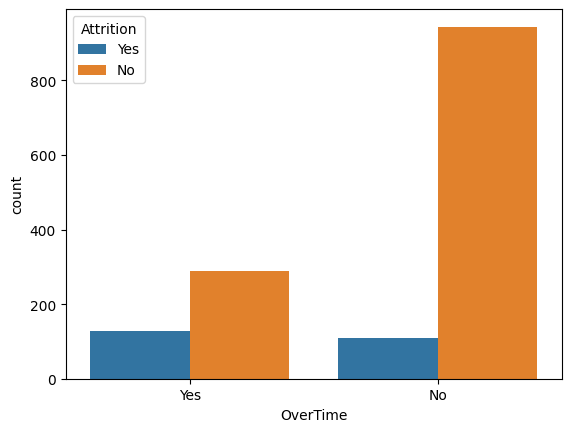

In [66]:
for col in df.select_dtypes('object').columns:
    sns.countplot(data=df,x=col,hue="Attrition")
    plt.show()

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



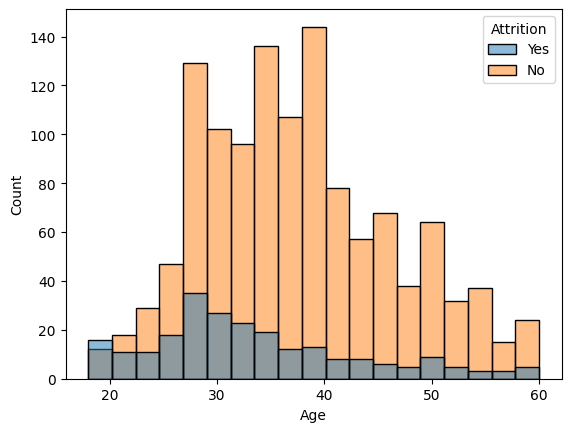

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



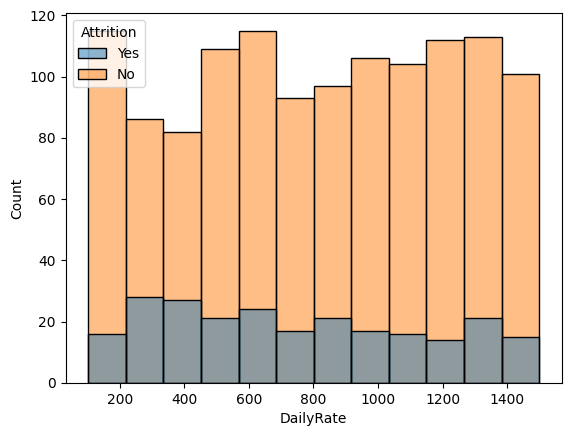

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



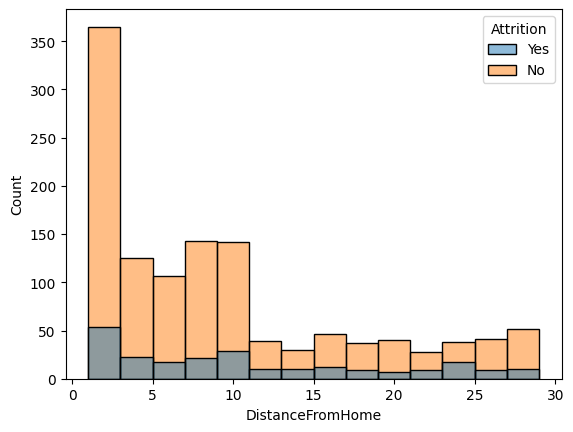

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



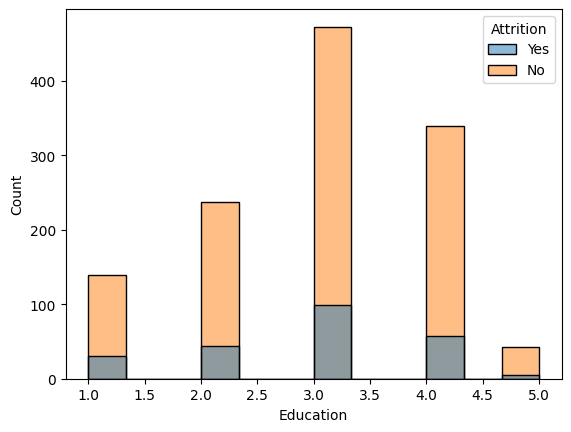

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



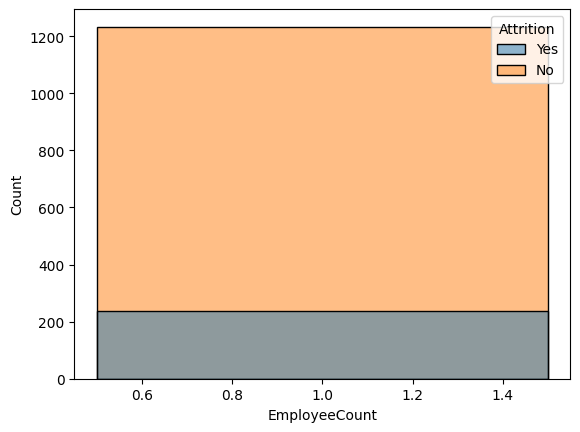

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



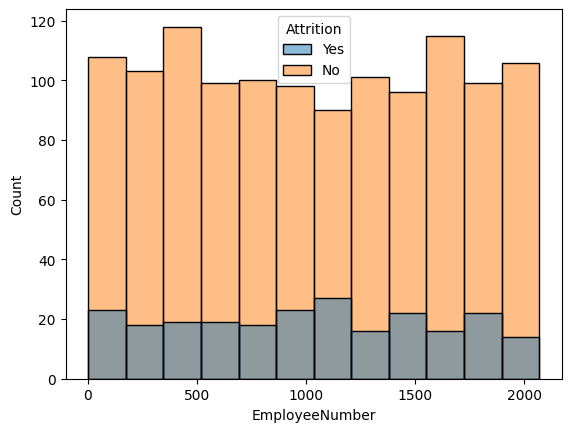

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



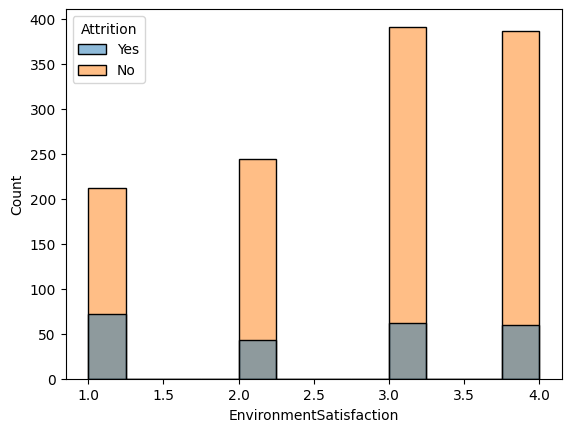

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



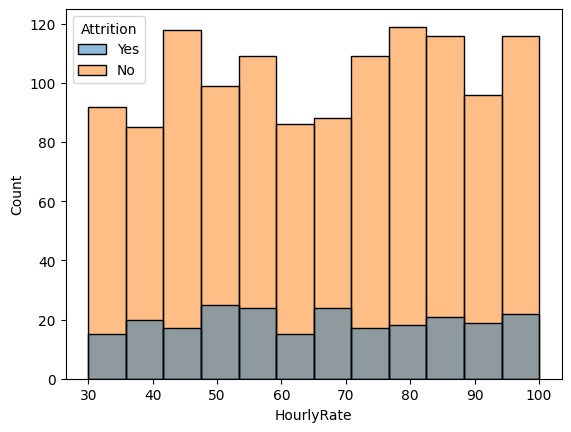

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



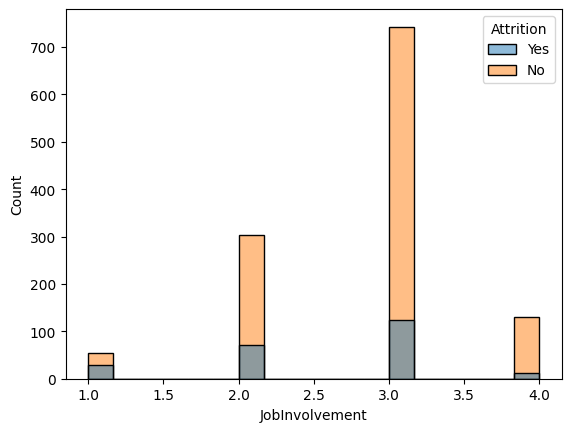

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



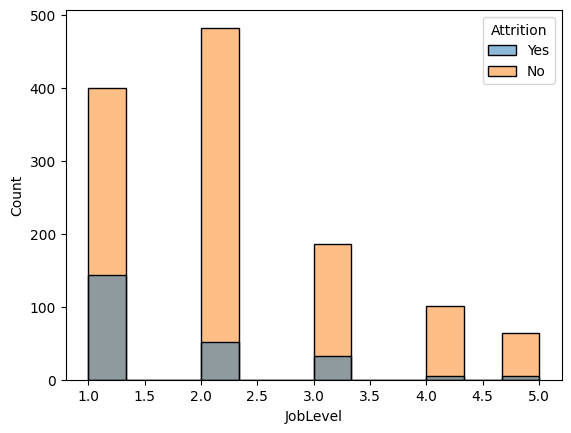

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



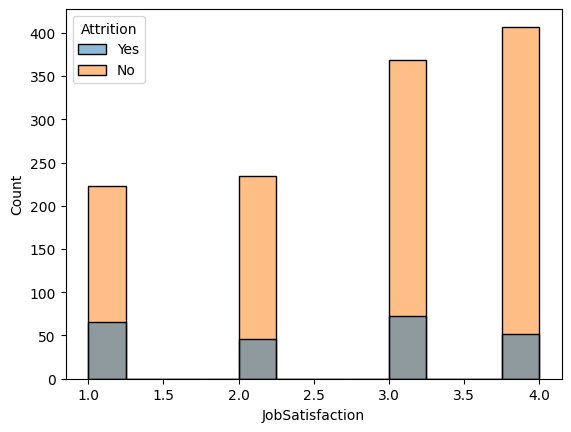

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



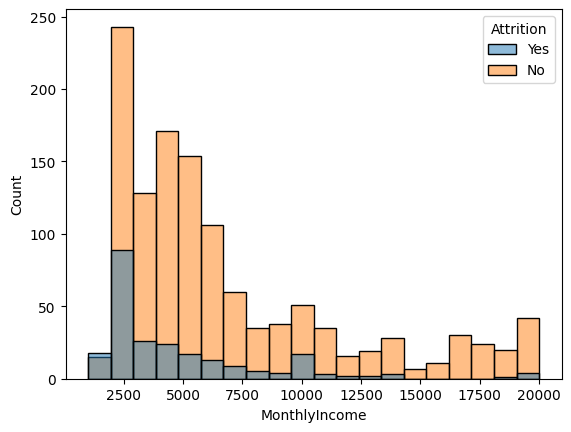

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



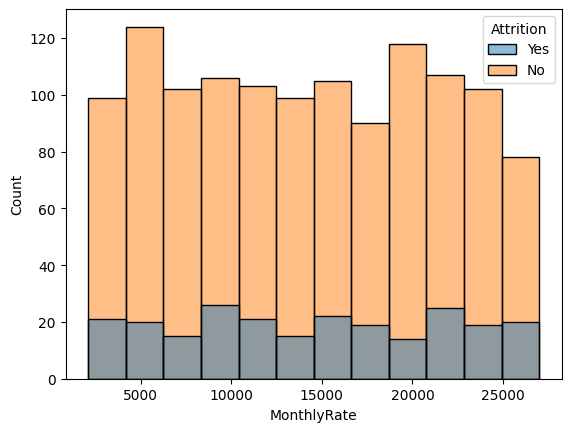

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



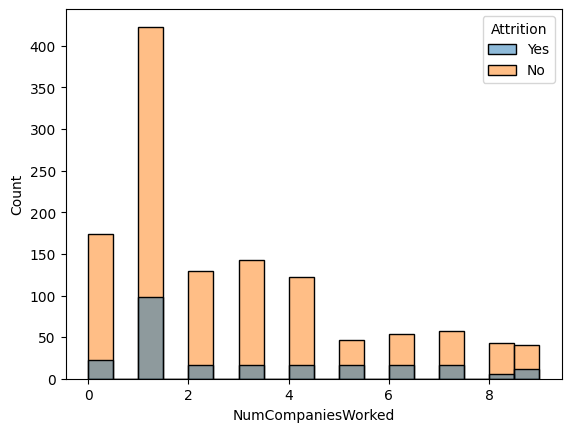

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



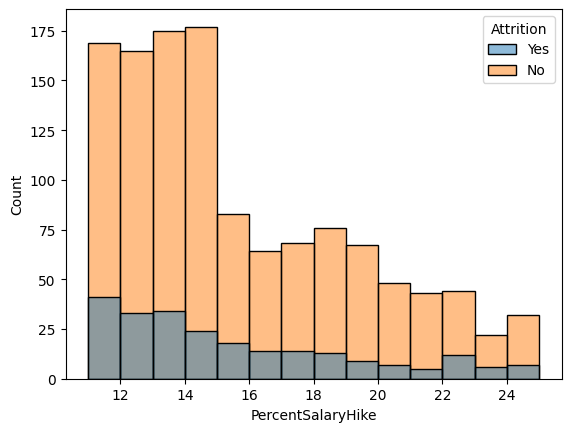

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



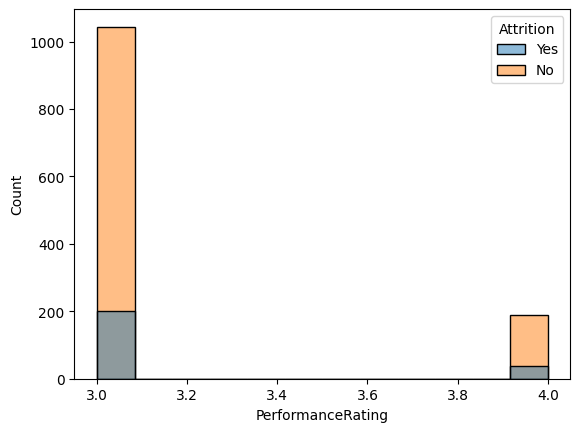

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



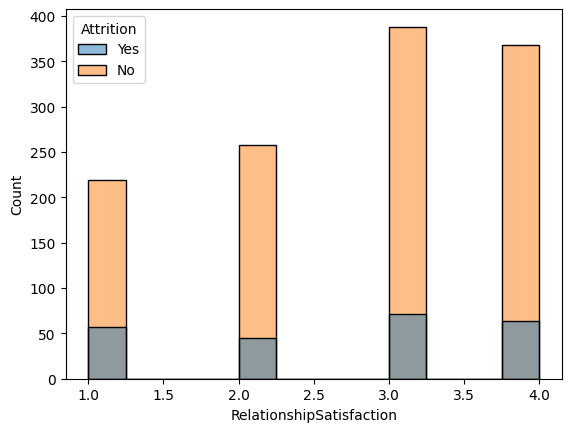

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



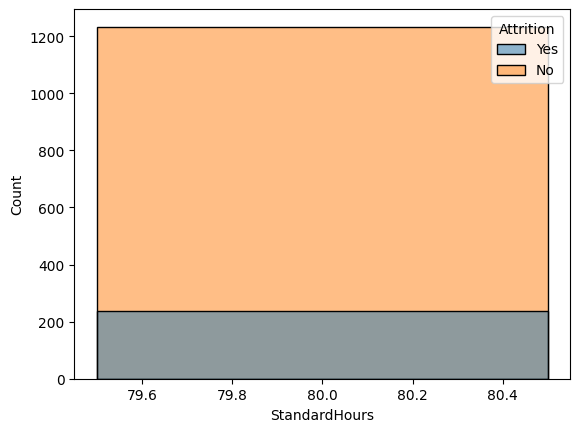

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



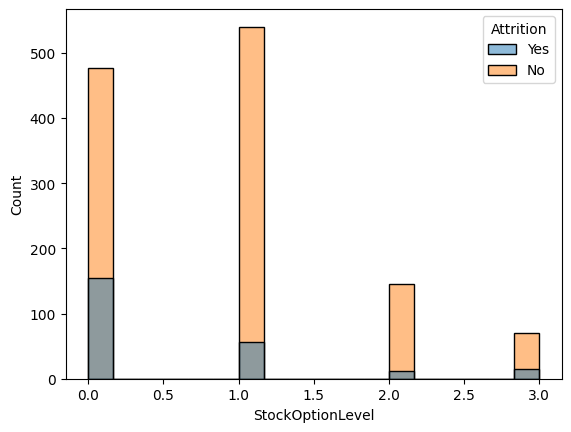

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



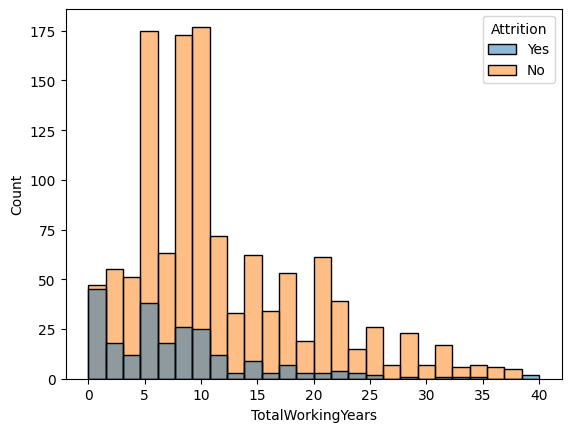

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



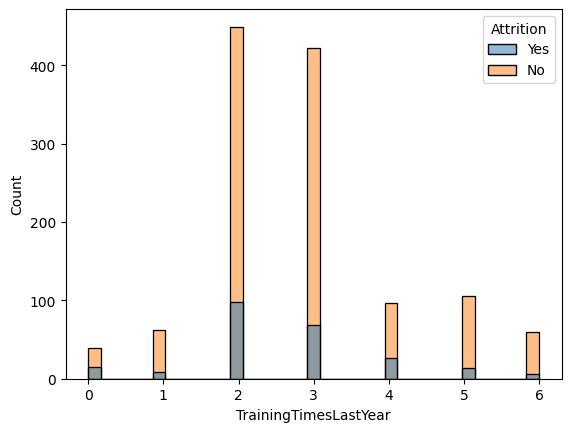

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



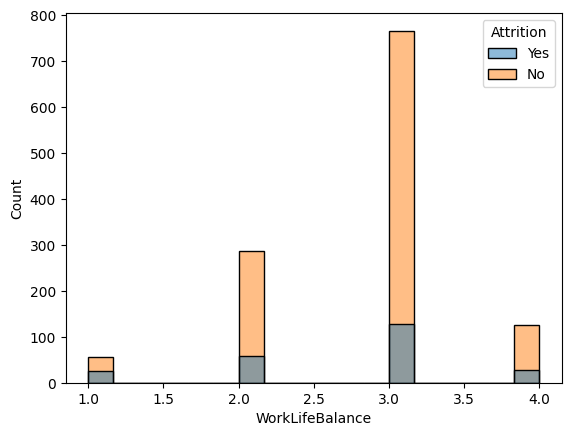

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



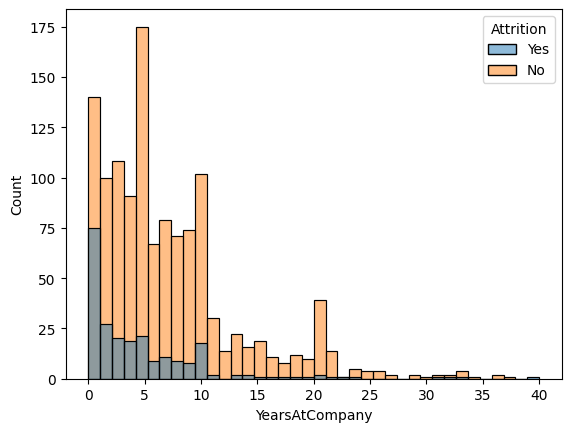

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



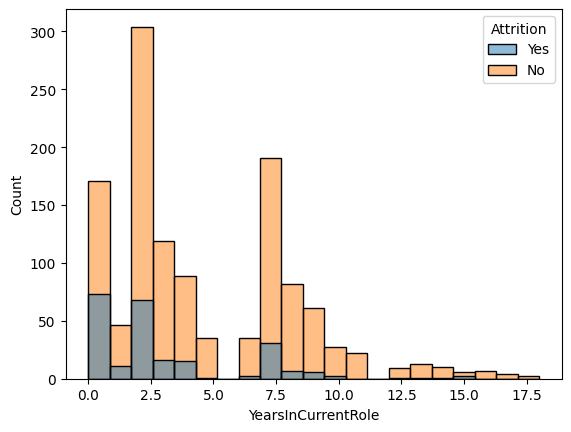

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



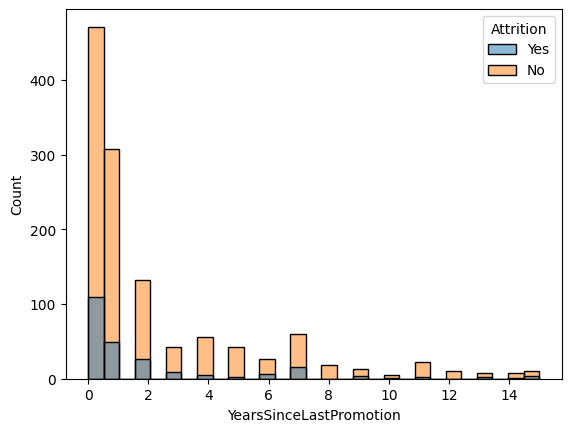

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Simran Bawaskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



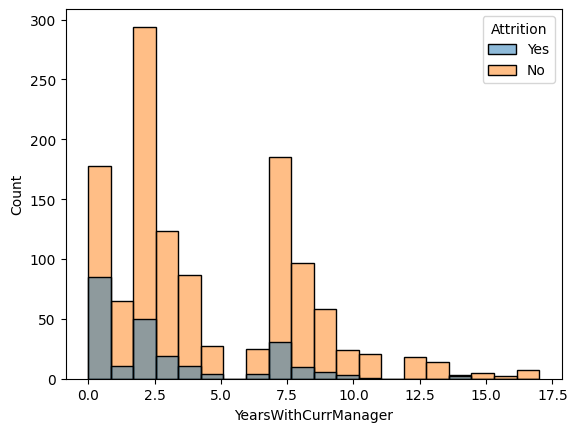

In [69]:
for col in df.select_dtypes('number').columns:
    sns.histplot(data=df,x=col,kde=False,hue="Attrition")
    plt.show()

Data Preparation

In [70]:
df_copy = df

df2 = df_copy.drop(['EmployeeCount','StandardHours','Over18'],axis=1)
df2.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [72]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [73]:
df2_copy = df2

df3 = df2_copy.drop('EmployeeNumber', axis=1)
df3.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   
5                 2          2  Life Sciences                        4   
6                 3          3        Medical                        3   
7                24          1  Life Sciences                        4   
8                23          3  Life Sciences                        4   
9                27          3        Medical                        3   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   
5    Male  ...                  3                         3                 0   
6  Female  ...                  4                         1                 3   
7    Male  ...                  4                         2                 1   
8    Male  ...                  4                         2                 0   
9    Male  ...                  3                         2                 2   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   
5                 8                      2               2               7   
6                12                      3               2               1   
7                 1                      2               3               1   
8                10                      2               3               9   
9                17                      3               2               7   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  
5                   7                        3                    6  
6                   0                        0                    0  
7                   0                        0                

In [74]:
for col in df3.select_dtypes(['object']):
    print(df3[col].value_counts())
    print('----------------next line-------------------')

Attrition
No     1233
Yes     237
Name: count, dtype: int64
----------------next line-------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
----------------next line-------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
----------------next line-------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
----------------next line-------------------
Gender
Male      882
Female    588
Name: count, dtype: int64
----------------next line-------------------
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representat

In [77]:
df3['OverTime']=df3['OverTime'].replace({'No':0,'Yes':1})
df3['OverTime']

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int64

In [78]:
target =df3['Attrition']

Text(0.5, 1.0, 'Attrition values')

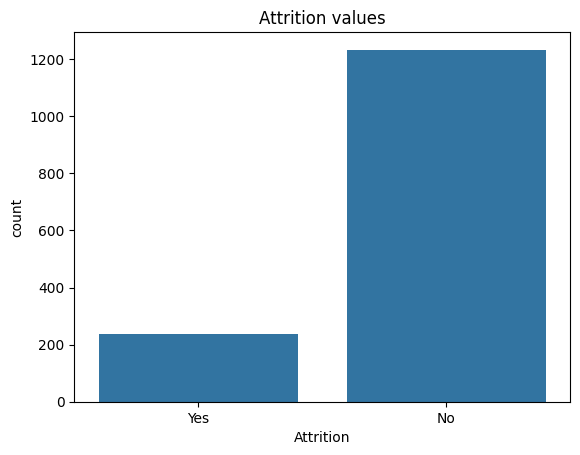

In [79]:
sns.countplot(x=target)
plt.title('Attrition values')

In [80]:
target = target.replace({'Yes':1,'No':0})
target

C:\Users\Simran Bawaskar\AppData\Local\Temp\ipykernel_19584\566165863.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [81]:
columns = ['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'JobRole', 'EducationField']

label_encoder = LabelEncoder()

for col in columns:
    df3[col] = label_encoder.fit_transform(df[col])

df3.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int32 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int32 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int32 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   int32 
 14  JobSatisfaction         

In [82]:
df3['target']=target
df3.head()

Age Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41       Yes               2       1102           2                 1   
1   49        No               1        279           1                 8   
2   37       Yes               2       1373           1                 2   
3   33        No               1       1392           1                 3   
4   27        No               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  target  
0                        0                     5       1  
1                        1                     7       0  
2                        0                     0       1  
3                        3                     0       0  
4                        2                     2       0  

[5 rows x 32 columns]

<Axes: >

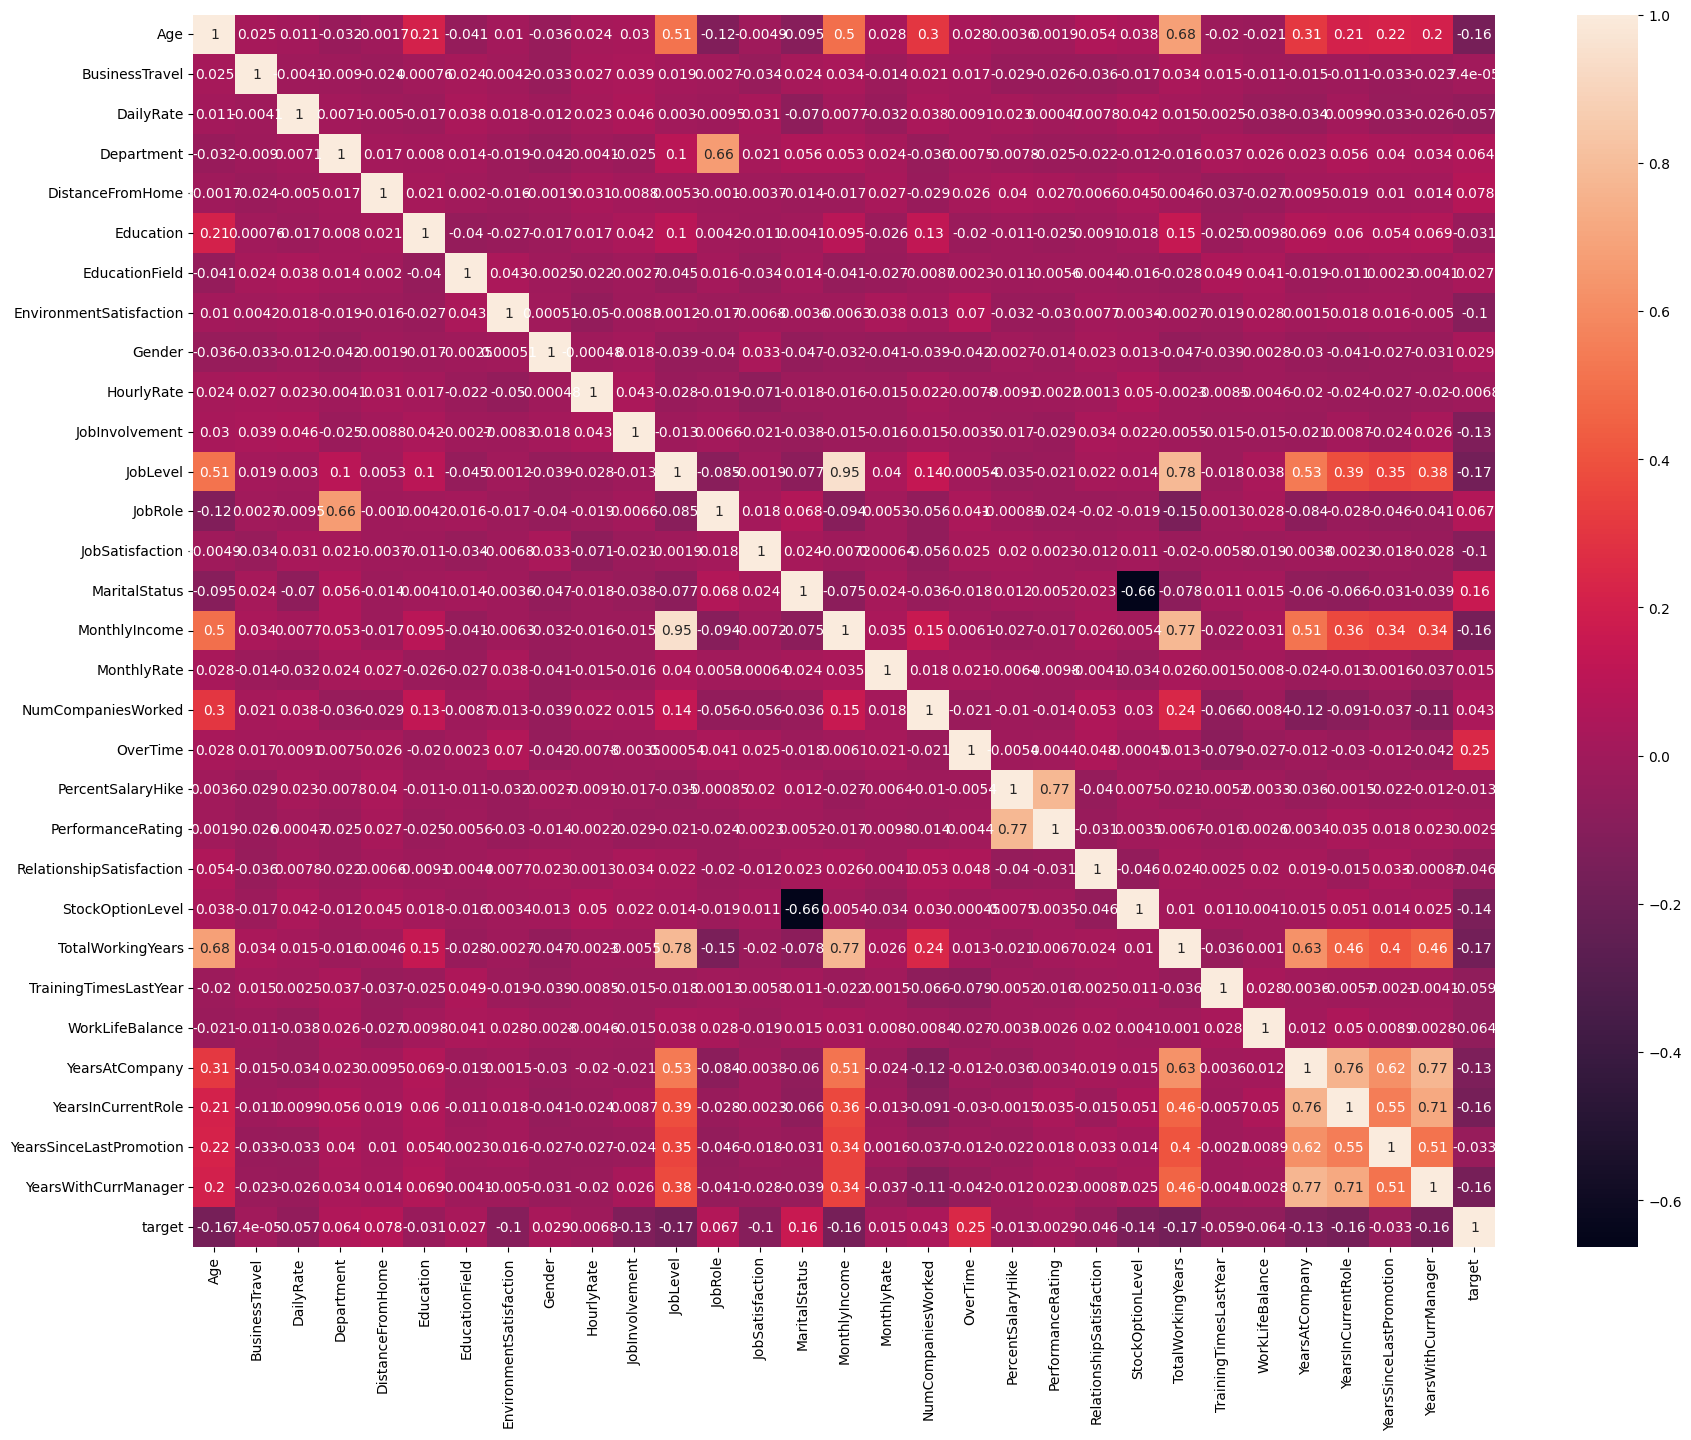

In [84]:
plt.figure(figsize=(21,16))
sns.heatmap(df3.select_dtypes('number').corr(),annot=True)

In [86]:
correlation_matrix = df3.select_dtypes('number').corr()

# Sort correlations with target variable (assuming target column is 'target')
correlation_with_target = correlation_matrix["target"].abs().sort_values(ascending=False)

# Display correlations
print(correlation_with_target)

target                      1.000000
OverTime                    0.246118
TotalWorkingYears           0.171063
JobLevel                    0.169105
MaritalStatus               0.162070
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
DailyRate                   0.056652
RelationshipSatisfaction    0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion     0.033019
Education                   0.031373
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
P

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=df3.drop(columns=['target','Attrition'],errors='ignore')

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by="VIF",ascending=False)


Feature         VIF
20         PerformanceRating  122.382855
11                  JobLevel   52.565598
19         PercentSalaryHike   42.266379
0                        Age   33.303362
15             MonthlyIncome   32.084632
25           WorkLifeBalance   15.595209
10            JobInvolvement   15.098622
23         TotalWorkingYears   14.597639
3                 Department   12.973418
9                 HourlyRate   11.244053
26            YearsAtCompany   10.578995
5                  Education    9.453687
12                   JobRole    8.078981
21  RelationshipSatisfaction    7.271234
7    EnvironmentSatisfaction    7.109660
13           JobSatisfaction    7.023244
1             BusinessTravel    6.744873
29      YearsWithCurrManager    6.495955
27        YearsInCurrentRole    6.439758
14             MaritalStatus    5.787900
24     TrainingTimesLastYear    5.717928
16               MonthlyRate    5.011517
2                  DailyRate    4.973985
6             EducationField    3.866745
22          StockOptionLevel    3.323906
17        NumCompaniesWorked    2.726026
8                     Gender    2.506220
28   YearsSinceLastPromotion    2.451288
4           DistanceFromHome    2.317141
18                  OverTime    1.433417

In [95]:
# Filter columns with VIF>10

high_vif_features = vif_data[vif_data["VIF"] > 10]
high_vif_features

Feature         VIF
0                 Age   33.303362
3          Department   12.973418
9          HourlyRate   11.244053
10     JobInvolvement   15.098622
11           JobLevel   52.565598
15      MonthlyIncome   32.084632
19  PercentSalaryHike   42.266379
20  PerformanceRating  122.382855
23  TotalWorkingYears   14.597639
25    WorkLifeBalance   15.595209
26     YearsAtCompany   10.578995

Drop columns with high correlation between each other

In [97]:
df4 = df3.copy()
df4.drop(['YearsWithCurrManager', 'JobLevel', 'MonthlyIncome'],axis=1,inplace=True)

In [101]:
df4.head()

Age Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41       Yes               2       1102           2                 1   
1   49        No               1        279           1                 8   
2   37       Yes               2       1373           1                 2   
3   33        No               1       1392           1                 3   
4   27        No               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  target  
0                   4                        0       1  
1                   7                        1       0  
2                   0                        0       1  
3                   7                        3       0  
4                   2                        2       0  

[5 rows x 29 columns]

<Axes: >

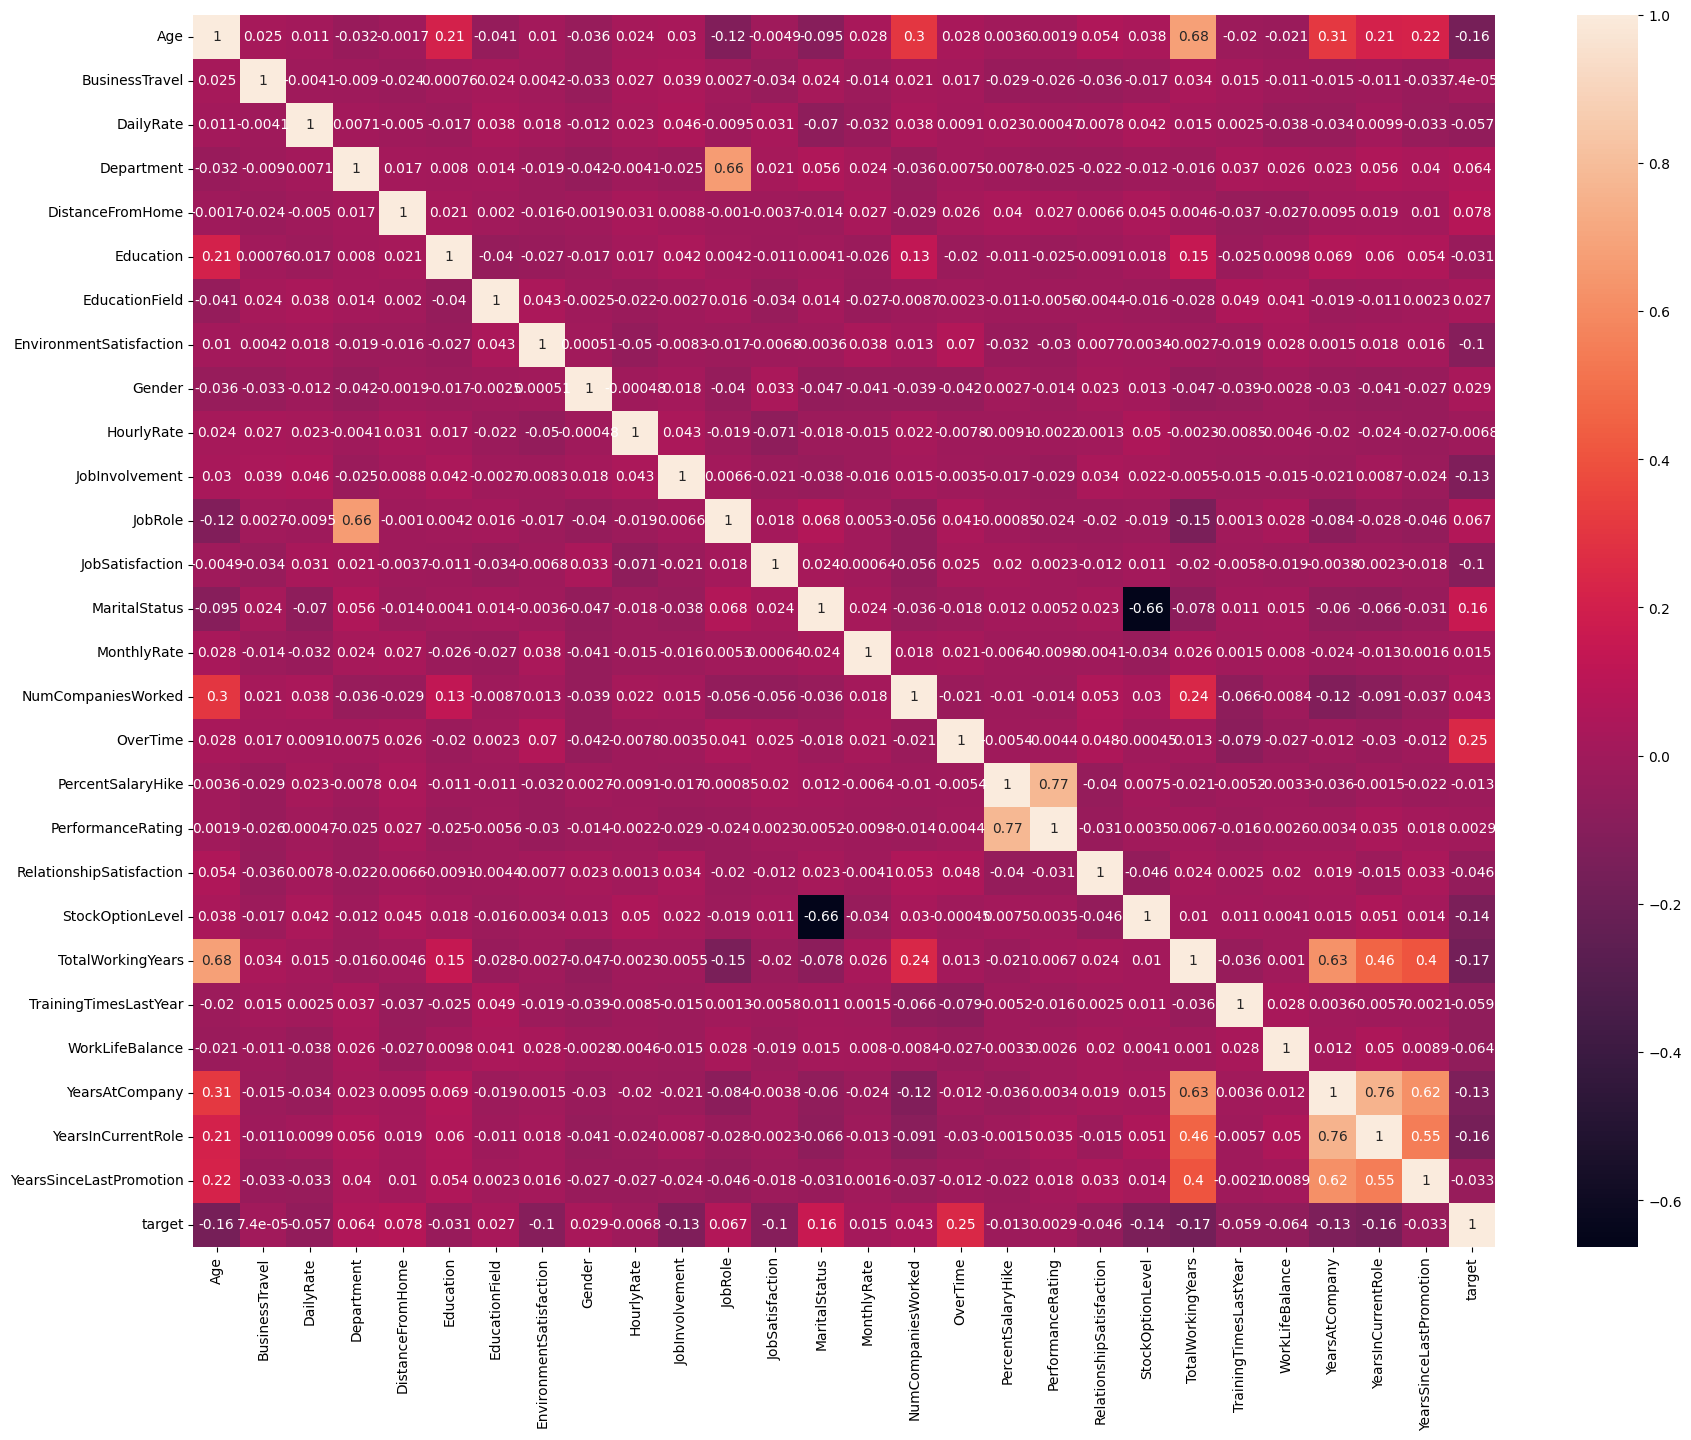

In [102]:
plt.figure(figsize=(21,16))
sns.heatmap(df4.select_dtypes('number').corr(),annot=True)

<Axes: >

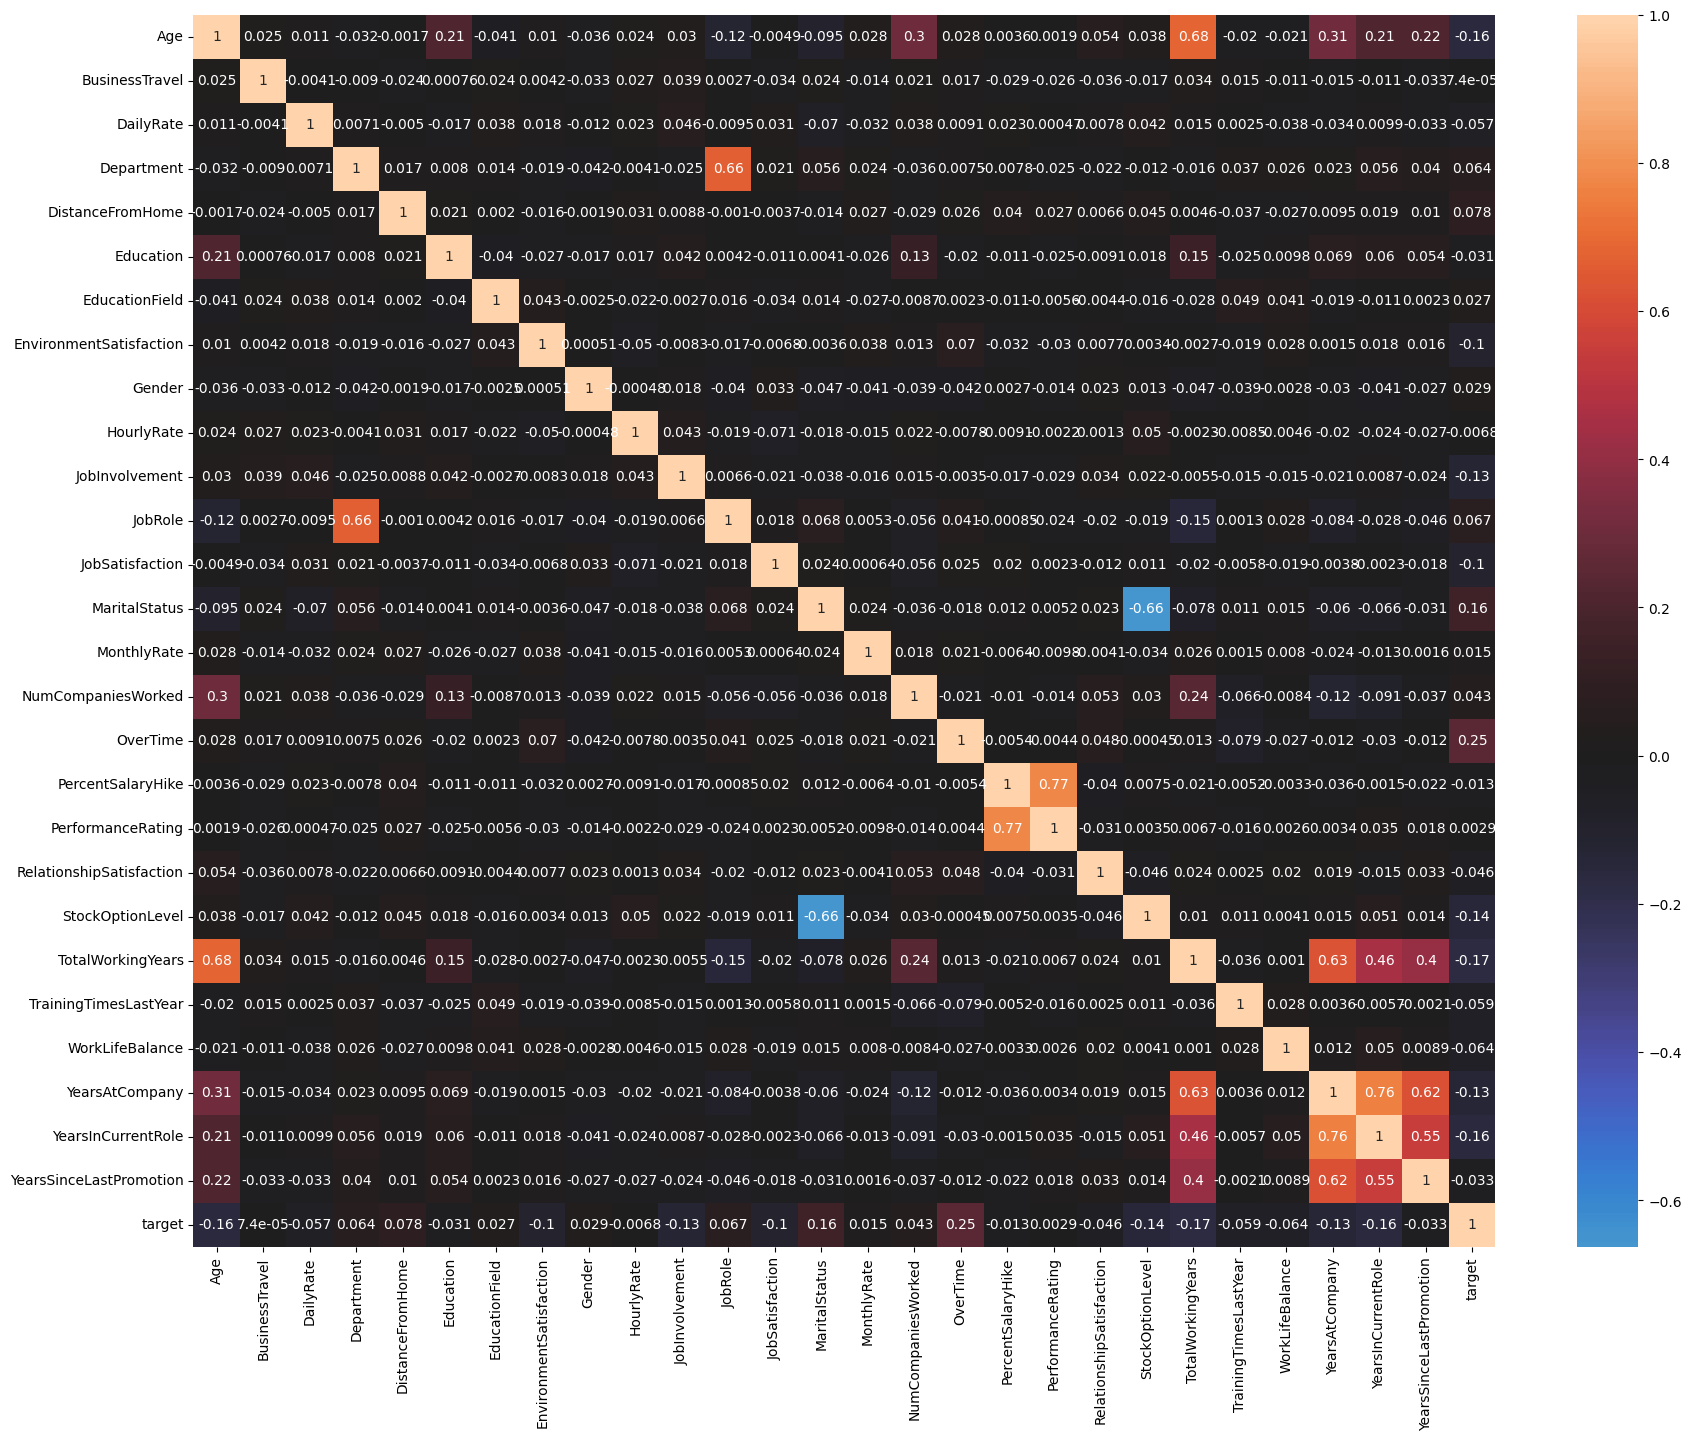

In [104]:
plt.figure(figsize=(21,16))
sns.heatmap(df4.select_dtypes('number').corr(), center=0, annot=True)

In [107]:
df5 = df4.copy()
df5.drop(['target','Attrition'],axis=1,inplace=True)
df5.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           2                 1          2   
1   49               1        279           1                 8          1   
2   37               2       1373           1                 2          2   
3   33               1       1392           1                 3          4   
4   27               2        591           1                 2          1   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               1                        2       0          94  ...   
1               1                        3       1          61  ...   
2               4                        4       1          92  ...   
3               1                        4       0          56  ...   
4               3                        1       1          40  ...   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  
0                        0  
1                        1  
2                        0  
3                        3  
4                        2  

[5 rows x 27 columns]

Models

In [108]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


x=df5
y=target

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Navie Bayes' : GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM':SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled,y_train)

    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test,y_pred)
    }

    print(f"\nResults for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(results[name]['confusion_matrix'])
    print("\nClassification Report:")
    print(results[name]['classification_report'])
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"\nCross-validation scores: {cv_scores}")
    print(f"Average CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

accuracies = {name: results[name]['accuracy'] for name in models.keys()}
best_model = max(accuracies, key=accuracies.get)
print(f"\nBest performing model: {best_model} with accuracy: {accuracies[best_model]:.4f}")

from sklearn.model_selection import GridSearchCV

if best_model == 'Random Forest':
    param_grid = {
        'n_estimators': [100,200,300],
        'max_depth': [10,20,30,None],
        'min_samples_split': [2,5,10],
        'min_samples_leaf': [1,2,4]
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    print("\nBest parameters for Random Forest:")
    print(grid_search.best_params_)
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance)


Results for Navie Bayes:
Accuracy: 0.8435

Confusion Matrix:
[[225  30]
 [ 16  23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       255
           1       0.43      0.59      0.50        39

    accuracy                           0.84       294
   macro avg       0.68      0.74      0.70       294
weighted avg       0.87      0.84      0.85       294


Cross-validation scores: [0.75847458 0.83404255 0.75744681 0.77021277 0.79148936]
Average CV score: 0.7823 (+/- 0.0572)

Results for Logistic Regression:
Accuracy: 0.8946

Confusion Matrix:
[[249   6]
 [ 25  14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294


accuracy = correct/total

We see that performance of predicting lower class(attrition=1) is bad since the dataset is unbalanced

In [109]:
from xgboost import XGBClassifier

# Initialize models
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# TRain models
xgb.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluate models
xgb_acc = accuracy_score(y_test, y_pred_xgb)

xgb_report = classification_report(y_test, y_pred_xgb)

xgb_cm = confusion_matrix(y_test,y_pred_xgb)

# Display results
results_df = pd.DataFrame({
    "Model": ["XGBoost (Boosting)"],
    "Accuracy": [xgb_acc]
})


# Format and print the evaluation results in a more readable way
print("\n============================================")
print("           XGBoost (Boosting) Results        ")
print("============================================")
print(f"Accuracy: {xgb_acc:.4f}\n")


print("confusion_matrix:")
print(pd.DataFrame(xgb_cm,
                   index=["Actual Negative", "Actual Positive"],
                   columns=["Predicted Negative", "Predicted Positive"]))

print("\nClassification Report:")
print(xgb_report)


           XGBoost (Boosting) Results        
Accuracy: 0.8741

confusion_matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 248                   7
Actual Positive                  30                   9

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.56      0.23      0.33        39

    accuracy                           0.87       294
   macro avg       0.73      0.60      0.63       294
weighted avg       0.85      0.87      0.85       294



In [110]:
import sklearn
import xgboost

print("Scikit-Learn Version:", sklearn.__version__)
print("XGBoost Version:", xgboost.__version__)

Scikit-Learn Version: 1.3.2
XGBoost Version: 3.0.0


In [115]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume X and y are defined (feature matrix & target variable)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Feature Scaling (recommended for boosting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# =======================BOOSTING (XGBOOST) ============================
xgb =XGBClassifier(n_estimator=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluation
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)
xgb_cm = confusion_matrix(y_test, y_pred_xgb)

# =======================BAGGING (RANDOM FOREST) ============================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
# Prediction
y_pred_rf = rf.predict(X_test_scaled)

# Evaluation
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test,y_pred_rf)
rf_cm = confusion_matrix(y_test,y_pred_rf)

# ======================= RESULTS COMPARISON ================================
results_df = pd.DataFrame({
    "Model": ["XGBoost (Boosting)", "Random Forest (Bagging)"],
    "Accuracy" : [xgb_acc, rf_acc]
})

# Print comparison table
print("\n============================================")
print("          Bagging vs. Boosting Results       ")
print("============================================")
print(results_df)

# Format and print the evaluation results in a more readable way
print("\n============================================")
print("           XGBoost (Boosting) Results        ")
print("============================================")
print(f"Accuracy: {xgb_acc:.4f}\n")
print("Confusion Matrix:")
print(pd.DataFrame(xgb_cm, 
                   index=["Actual Negative", "Actual Positive"], 
                   columns=["Predicted Negative", "Predicted Positive"]))
print("\nClassification Report:")
print(xgb_report)

print("\n============================================")
print("       Random Forest (Bagging) Results       ")
print("============================================")
print(f"Accuracy: {rf_acc:.4f}\n")
print("Confusion Matrix:")
print(pd.DataFrame(rf_cm, 
                   index=["Actual Negative", "Actual Positive"], 
                   columns=["Predicted Negative", "Predicted Positive"]))
print("\nClassification Report:")
print(rf_report)



          Bagging vs. Boosting Results       
                     Model  Accuracy
0       XGBoost (Boosting)  0.833333
1  Random Forest (Bagging)  0.880952

           XGBoost (Boosting) Results        
Accuracy: 0.8333

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 231                  24
Actual Positive                  25                  14

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       255
           1       0.37      0.36      0.36        39

    accuracy                           0.83       294
   macro avg       0.64      0.63      0.63       294
weighted avg       0.83      0.83      0.83       294


       Random Forest (Bagging) Results       
Accuracy: 0.8810

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 254                   1
Actual Positive                  34          